# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
import plotly.offline as offline
import plotly.graph_objs as go


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
86221        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
18308       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
86221           CA 2016-04-27 00:27:00          Grades PreK-2   
18308           UT 2016-04-27 00:31:00             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
86221             Math & Science  Applied Sciences, Health & Life Science   
18308              Special Needs                            Special Needs   

                                      project_title  \
86221  Engineering STEAM into the Primary Classroom   
18308                       Sensory Tools for Focus   

                                         project_essay_1  \
86221  I have been fortunate enough to use the Fairy ...   
18308  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
86221  My students come from a variety of backgrounds...   
18308  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
86221  Each month I try to do several science or STEM...   
18308  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
86221  It is challenging to develop high quality scie...   
18308  When my students are able to calm themselves d...   

                                project_resource_summary  \
86221  My students need STEM kits to learn critical s...   
18308  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
86221                                            53                    1  
18308                                             4                    1

In [5]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [8]:
sorted_cat_dict

{'Warmth': 1388,
 'Care_Hunger': 1388,
 'History_Civics': 5914,
 'Music_Arts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'Health_Sports': 14223,
 'Math_Science': 41421,
 'Literacy_Language': 52239}

## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
86221        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
18308       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
86221           CA 2016-04-27 00:27:00          Grades PreK-2   
18308           UT 2016-04-27 00:31:00             Grades 3-5   

                                      project_title  \
86221  Engineering STEAM into the Primary Classroom   
18308                       Sensory Tools for Focus   

                                         project_essay_1  \
86221  I have been fortunate enough to use the Fairy ...   
18308  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
86221  My students come from a variety of backgrounds...   
18308  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
86221  Each month I try to do several science or STEM...   
18308  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
86221  It is challenging to develop high quality scie...   
18308  When my students are able to calm themselves d...   

                                project_resource_summary  \
86221  My students need STEM kits to learn critical s...   
18308  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
86221                                            53                    1   
18308                                             4                    1   

      clean_categories                 clean_subcategories  \
86221     Math_Science  AppliedSciences Health_LifeScience   
18308     SpecialNeeds                        SpecialNeeds   

                                                   essay  
86221  I have been fortunate enough to use the Fairy ...  
18308  Imagine being 8-9 years old. You're in your th...

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [13]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
len_essay=[]
# tqdm is for printing the status bar
for sentance1 in tqdm(project_data['essay'].values):
    sent= sentance1.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    len_essay.append(len(sent.split()))
num_essay=np.array(len_essay)    
    

100%|████████████████████████████████| 109248/109248 [01:34<00:00, 1151.60it/s]


In [14]:
# after preprocesing
project_data['essay']=preprocessed_essays
project_data['num_essay']=num_essay
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
print(project_data['essay'].values[0])

fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students month try several science stem steam projects would use kits robot help guide science instruction engaging meaningful ways adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed following units taught next school year implement kits magnets motion sink vs float robots often get units not know teaching right way using right materials kits give additional ideas strategies lessons prepare students science challenging develop high quality science activities kits give materials need provide students science activities go along curriculum classroom althou

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [15]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
len_project=[]
# tqdm is for printing the status bar
for sentence2 in tqdm(project_data['project_title'].values):
    sent = sentence2.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    len_project.append(len(sent.split()))
num_project=np.array(len_project)

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 26693.30it/s]


In [16]:
# after preprocesing
project_data['project_title']=preprocessed_titles
project_data['num_project']=num_project
print(project_data['project_title'][0])

not 21st century learners across ocean


In [17]:
#Preprocessing the project_grade_category
project_grade_category_cleaned=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    project_grade_category_cleaned.append(grade)
project_data['Project_grade_category']=project_grade_category_cleaned

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 674296.19it/s]


In [18]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

In [19]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:00          Grades PreK-2   
1           UT 2016-04-27 00:31:00             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  num_essay  num_project  \
0  fortunate enough use fairy tale stem kits clas...        156            4   
1  imagine 8 9 years old third grade classroom se...        159            3   

  Project_grade_category   price  quantity  
0          Grades_PreK_2  725.05         4  
1             Grades_3_5  213.03         8

<h1>2. Clustering </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [20]:
from sklearn.model_selection import train_test_split
# split the data set into train and test respectively 80% and 20%
y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1, inplace=True)
x=project_data
X_temp,X_test,Y_temp,Y_test=train_test_split(x,y,test_size=0.33,random_state=1)
# split the data set into train and cv respectively 60% and 20%  
X_train,X_cv,Y_train,Y_cv=train_test_split(X_temp,Y_temp,test_size=0.33,random_state=1)
print("Shape of Train data set X={} Y={}".format(X_train.shape,Y_train.shape))
print("Shape of Test data set X={} Y={}".format(X_test.shape,Y_test.shape))
print("Shape of CV data set X={} Y={}".format(X_cv.shape,Y_cv.shape))

Shape of Train data set X=(49041, 18) Y=(49041,)
Shape of Test data set X=(36052, 18) Y=(36052,)
Shape of CV data set X=(24155, 18) Y=(24155,)


In [21]:
X_train

Unnamed: 0       id                        teacher_id teacher_prefix  \
22470        16301  p102862  8b996f6d87703d2630413100b590dd62            Ms.   
61672        74853  p119206  058b33d511a2c806b2396ef8c27b9c72            Ms.   
22765        81958  p094993  c4929600d3c4c4447404f3b8f8fb05de           Mrs.   
91723        90360  p218593  9af2b10274f7ef464214490b41d880a2            Ms.   
46625       171921  p256636  66c62ddf88b4a969523f481c675669da            Ms.   
6421          9308  p253067  7e6a71daf5ad7184212cc9d1dbc81ef2           Mrs.   
4586        160927  p158249  534ed3557240db520d31b486520aa671            Ms.   
36707       138757  p151306  575a29f894b432175a39aa89d5b8eac4           Mrs.   
94064       105065  p222160  2f02b02985e96ff60eef2fc454a2e583            Ms.   
5793         44766  p188013  c127da422fef57b697848b51fd749a2d            Ms.   
11468       172887  p066694  9154d5a7f43daed71fd36482a219a1ba            Ms.   
19487        95536  p150931  4d61b48d9fc6079b00d29f0be8ce9ebb           Mrs.   
101968       43885  p183732  d7cfd2ca99a8e5cd09584066c9a652d8           Mrs.   
42760        32327  p033758  24b16eab588c205e57e881507124f8ec           Mrs.   
35806        71346  p052892  ab70a8377d8c3a3d39abdf07952fd5cb            Mr.   
107162      138674  p039886  7880a7d016af55888fcd2e89c6c5bdb3        Teacher   
63827       149341  p212388  0dfba10f0b472746a6f299ae1305a8b5           Mrs.   
59531       158504  p078916  b17cd8bd63c8e483996a50ec3c897884            Ms.   
12236       133294  p190076  192e2297f28f215a7bb04e46976f7635           Mrs.   
100472      121019  p162414  768858c081bf21f52391d22d4a076c93            Ms.   
49621        57208  p044139  e5daf8ee734e210adc46b274f80b4617           Mrs.   
31746        68100  p027200  4d4a80291fba284072d7b0500b9959a5           Mrs.   
33734        29591  p232234  dafb8f8281abb69de7d7fb130cd4c094           Mrs.   
13098         8165  p049303  48420505bba11f394328af01c031146a           Mrs.   
486          43970  p010063  75141e4d4e6d3528fc3ad8e41ce10507            Ms.   
104741       35328  p044957  7b300390394e42d705052b0f31987847           Mrs.   
68542        50225  p229836  cb252bccc27cb4a844e0768f9028b662            Ms.   
8371         77239  p186485  51c9febc13e9eee85340bab63039ea47           Mrs.   
59708       143418  p212155  8c4a1d8b60eaf7f7c51bfcc427f760fe           Mrs.   
45304        54284  p076203  d5a5f5982be75de8505ef87b32065b8d           Mrs.   
...            ...      ...                               ...            ...   
17841       174589  p051075  701e372cc06523c94e9190b96193e083           Mrs.   
39012        77677  p161110  c5e25a88441371d34d9f9fd192851cfe           Mrs.   
95333       139210  p224245  8d76514e7e465647352e71c1164811f5           Mrs.   
93731       149816  p056613  ced23d893362685d452c288a76329490           Mrs.   
47164        57474  p088604  f90538aa0f68aa2cf515b875a40ca2cd           Mrs.   
97712       170587  p250570  00e6d08a58ebd94682732ddbe2202070            Mr.   
29484        69955  p089740  8f6207014defbeb6e91838a032c93000            Ms.   
23731        80830  p052701  7f8cbd9fff1b0a3d801fac6e7dc11d5d           Mrs.   
98627       135443  p009940  0d572366d6900c05a09343bf050dea31           Mrs.   
95932       177898  p131398  296dd2635e771ab18ab1b2f1618d0c71           Mrs.   
76279       132858  p179883  df2c697e6c4300c22e19fce7069241ef           Mrs.   
56123        57901  p051721  9a27a7309e856b4675f3c757fda01919           Mrs.   
92852       173593  p250144  5f66077740964356d0b343e9451baa17           Mrs.   
2949        123094  p140157  897088ead72deae7ba7b69afb22aa237           Mrs.   
96600        50435  p072462  ade8ccc09f84f6307fd9168d0d51c3ff        Teacher   
28519        71186  p014116  6ff7df2e136d2d78157de3acb32f1a57            Mr.   
50290       145316  p113481  29f82785e11dd7aef70b98223f5686df           Mrs.   
49997        81793  p052626  5954eb3bd8f2ae3446f3ba94bd4357d2           Mrs.   
84681   

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

###  Vectorizing Categorical data

In [22]:
#Response coding

def get_prob(x_columns,x_column_name,y,all_unique_values):
    i=0
    prob_temp=0.
    prob_1=[]
    prob_0=[]
    new_column_1=x_column_name+'_approved' #if column is clean_categories then new_column_1=clean_categories_approved
    new_column_0=x_column_name+'_not_approved'#if column is clean_categories then new_column_0=clean_categories_not_approved
    #all_unique_values=x_columns[x_column_name].unique()
    for unique in tqdm(all_unique_values):
        total_unique=x_columns[(x_columns[x_column_name]==unique)].count()[0]#getting total count of  unique word in column 
        unique_count=x_columns[(x_columns[x_column_name]==unique)&(y==1)].count()[0]#getting count of  unique word in column where class label is 1
        prob_temp=round((unique_count/total_unique),3)#Calculating the probability of unique word where class label is 1 
        prob_1.append(prob_temp)
        prob_0.append(round((1-prob_temp),3))#Calculating the probability of unique word where class label is 0
    d={'Name':all_unique_values,"Approved":prob_1,"Not_approved":prob_0}
    df = pd.DataFrame(data=d)
    print(df[0:2])
    for unique in all_unique_values:
        x_columns.loc[(x_columns[x_column_name]==unique),new_column_1]=df.loc[(df["Name"]==unique),"Approved"][i]#Updating the probabilities to the dataset 
        x_columns.loc[(x_columns[x_column_name]==unique),new_column_0]=df.loc[(df["Name"]==unique),"Not_approved"][i]#Updating the probabilities to the dataset 
        i=i+1 
    return(x_columns[new_column_1],x_columns[new_column_0])

In [23]:
#Response coding
# clean_categories
all_unique_values=X_train["clean_categories"].unique()# getting all unique data from column
tr_categories_approved,tr_categories_not_approved = get_prob(X_train,"clean_categories",Y_train,all_unique_values)
cv_categories_approved,cv_categories_not_approved = get_prob(X_cv,"clean_categories",Y_cv,all_unique_values)
te_categories_approved,te_categories_not_approved = get_prob(X_test,"clean_categories",Y_test,all_unique_values)
tr_categories_approved=np.array(tr_categories_approved).reshape(-1,1)
tr_categories_not_approved=np.array(tr_categories_not_approved).reshape(-1,1)
cv_categories_approved=np.array(cv_categories_approved).reshape(-1,1)
cv_categories_not_approved=np.array(cv_categories_not_approved).reshape(-1,1)
te_categories_approved=np.array(te_categories_approved).reshape(-1,1)
te_categories_not_approved=np.array(te_categories_not_approved).reshape(-1,1)


100%|██████████████████████████████████████████| 50/50 [00:01<00:00, 36.13it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.852         0.148
1   Math_Science     0.820         0.180


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 53.90it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.843         0.157
1   Math_Science     0.812         0.188


100%|██████████████████████████████████████████| 50/50 [00:01<00:00, 42.06it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.848         0.152
1   Math_Science     0.824         0.176


In [24]:
#Response coding
# clean_subcategories
all_unique_values=X_train["clean_subcategories"].unique()# getting all unique data from column
tr_sub_categories_approved,tr_sub_categories_not_approved = get_prob(X_train,"clean_subcategories",Y_train,all_unique_values)
cv_sub_categories_approved,cv_sub_categories_not_approved = get_prob(X_cv,"clean_subcategories",Y_cv,all_unique_values)
te_sub_categories_approved,te_sub_categories_not_approved = get_prob(X_test,"clean_subcategories",Y_test,all_unique_values)
tr_sub_categories_approved=np.array(tr_sub_categories_approved).reshape(-1,1)
tr_sub_categories_not_approved=np.array(tr_sub_categories_not_approved).reshape(-1,1)
cv_sub_categories_approved=np.array(cv_sub_categories_approved).reshape(-1,1)
cv_sub_categories_not_approved=np.array(cv_sub_categories_not_approved).reshape(-1,1)
te_sub_categories_approved=np.array(te_sub_categories_approved).reshape(-1,1)
te_sub_categories_not_approved=np.array(te_sub_categories_not_approved).reshape(-1,1)

100%|████████████████████████████████████████| 377/377 [00:09<00:00, 40.73it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.857         0.143
1                     AppliedSciences     0.815         0.185


100%|████████████████████████████████████████| 377/377 [00:05<00:00, 68.50it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.806         0.194
1                     AppliedSciences     0.819         0.181


100%|████████████████████████████████████████| 377/377 [00:07<00:00, 52.48it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.829         0.171
1                     AppliedSciences     0.821         0.179


In [25]:
#Response coding
#teacher_prefix
all_unique_values=X_train["teacher_prefix"].unique()# getting all unique data from column
tr_teacher_prefix_approved,tr_teacher_prefix_not_approved = get_prob(X_train,"teacher_prefix",Y_train,all_unique_values)
cv_teacher_prefix_approved,cv_teacher_prefix_not_approved = get_prob(X_cv,"teacher_prefix",Y_cv,all_unique_values)
te_teacher_prefix_approved,te_teacher_prefix_not_approved = get_prob(X_test,"teacher_prefix",Y_test,all_unique_values)
tr_teacher_prefix_approved=np.array(tr_teacher_prefix_approved).reshape(-1,1)
tr_teacher_prefix_not_approved=np.array(tr_teacher_prefix_not_approved).reshape(-1,1)
cv_teacher_prefix_approved=np.array(cv_teacher_prefix_approved).reshape(-1,1)
cv_teacher_prefix_not_approved=np.array(cv_teacher_prefix_not_approved).reshape(-1,1)
te_teacher_prefix_approved=np.array(te_teacher_prefix_approved).reshape(-1,1)
te_teacher_prefix_not_approved=np.array(te_teacher_prefix_not_approved).reshape(-1,1)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 15.63it/s]


   Name  Approved  Not_approved
0   Ms.     0.843         0.157
1  Mrs.     0.855         0.145


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 30.67it/s]


   Name  Approved  Not_approved
0   Ms.     0.843         0.157
1  Mrs.     0.854         0.146


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 19.72it/s]


   Name  Approved  Not_approved
0   Ms.     0.844         0.156
1  Mrs.     0.857         0.143


In [26]:
#Response coding
# Project school_state
all_unique_values=X_train["school_state"].unique()# getting all unique data from column
tr_school_state_approved,tr_school_state_not_approved = get_prob(X_train,"school_state",Y_train,all_unique_values)
cv_school_state_approved,cv_school_state_not_approved = get_prob(X_cv,"school_state",Y_cv,all_unique_values)
te_school_state_approved,te_school_state_not_approved = get_prob(X_test,"school_state",Y_test,all_unique_values)
tr_school_state_approved=np.array(tr_school_state_approved).reshape(-1,1)
tr_school_state_not_approved=np.array(tr_school_state_not_approved).reshape(-1,1)
cv_school_state_approved=np.array(cv_school_state_approved).reshape(-1,1)
cv_school_state_not_approved=np.array(cv_school_state_not_approved).reshape(-1,1)
te_school_state_approved=np.array(te_school_state_approved).reshape(-1,1)
te_school_state_not_approved=np.array(te_school_state_not_approved).reshape(-1,1)

100%|██████████████████████████████████████████| 51/51 [00:01<00:00, 39.68it/s]


  Name  Approved  Not_approved
0   CA     0.858         0.142
1   VA     0.843         0.157


100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 63.96it/s]


  Name  Approved  Not_approved
0   CA     0.858         0.142
1   VA     0.845         0.155


100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 51.13it/s]


  Name  Approved  Not_approved
0   CA     0.858         0.142
1   VA     0.865         0.135


In [27]:
#Response coding
# Project project_grade_category
all_unique_values=X_train["project_grade_category"].unique()# getting all unique data from column
tr_project_grade_category_approved,tr_project_grade_category_not_approved = get_prob(X_train,"project_grade_category",Y_train,all_unique_values)
cv_project_grade_category_approved,cv_project_grade_category_not_approved = get_prob(X_cv,"project_grade_category",Y_cv,all_unique_values)
te_project_grade_category_approved,te_project_grade_category_not_approved = get_prob(X_test,"project_grade_category",Y_test,all_unique_values)
tr_project_grade_category_approved=np.array(tr_project_grade_category_approved).reshape(-1,1)
tr_project_grade_category_not_approved=np.array(tr_project_grade_category_not_approved).reshape(-1,1)
cv_project_grade_category_approved=np.array(cv_project_grade_category_approved).reshape(-1,1)
cv_project_grade_category_not_approved=np.array(cv_project_grade_category_not_approved).reshape(-1,1)
te_project_grade_category_approved=np.array(te_project_grade_category_approved).reshape(-1,1)
te_project_grade_category_not_approved=np.array(te_project_grade_category_not_approved).reshape(-1,1)

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 14.78it/s]


            Name  Approved  Not_approved
0     Grades 3-5     0.854         0.146
1  Grades PreK-2     0.849         0.151


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 24.81it/s]


            Name  Approved  Not_approved
0     Grades 3-5     0.850         0.150
1  Grades PreK-2     0.849         0.151


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 17.99it/s]


            Name  Approved  Not_approved
0     Grades 3-5     0.858         0.142
1  Grades PreK-2     0.849         0.151


###  standardizing Numerical features

In [28]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
tr_price_standardized=price_scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
te_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 298.5818657857711, Standard deviation : 363.8573751232583


In [29]:
print("\nShape of matrix after column standardization for 'price'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_price_standardized.shape,cv_price_standardized.shape,te_price_standardized.shape))


Shape of matrix after column standardization for 'price'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [30]:
#quantity
quantity_scalar = StandardScaler()
tr_quantity_standardized=quantity_scalar.fit_transform(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_quantity_standardized = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
te_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'quantity'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_quantity_standardized.shape,cv_quantity_standardized.shape,te_quantity_standardized.shape))

Mean : 16.96853653065802, Standard deviation : 26.262737421015874

Shape of matrix after column standardization for 'quantity'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [31]:
#teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
tr_teacher_number_of_previously_posted_projects_standardized=teacher_number_of_previously_posted_projects_scalar.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
te_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_teacher_number_of_previously_posted_projects_standardized.shape,cv_teacher_number_of_previously_posted_projects_standardized.shape,te_teacher_number_of_previously_posted_projects_standardized.shape))

Mean : 11.03756040863767, Standard deviation : 27.38081956899988

Shape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [32]:
#Number of words in essay 
num_essay_scalar = StandardScaler()
tr_num_essay_standardized=num_essay_scalar.fit_transform(X_train['num_essay'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_essay_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_num_essay_standardized = num_essay_scalar.transform(X_cv['num_essay'].values.reshape(-1, 1))
te_num_essay_standardized = num_essay_scalar.transform(X_test['num_essay'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_essay'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_num_essay_standardized.shape,cv_num_essay_standardized.shape,te_num_essay_standardized.shape))

Mean : 138.1287086315532, Standard deviation : 36.41300099141212

Shape of matrix after column standardization for 'num_essay'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [33]:
#Number of words in essay 
num_project_scalar = StandardScaler()
tr_num_project_standardized=num_project_scalar.fit_transform(X_train['num_project'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_project_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_num_project_standardized = num_project_scalar.transform(X_cv['num_project'].values.reshape(-1, 1))
te_num_project_standardized = num_project_scalar.transform(X_test['num_project'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_project'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_num_project_standardized.shape,cv_num_project_standardized.shape,te_num_project_standardized.shape))

Mean : 3.6965600212067455, Standard deviation : 1.523906739030445

Shape of matrix after column standardization for 'num_project'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### Vectorizing Text data

 <h4><font color='red'>  Bag of Words on `preprocessed_essay`</font></h4>

In [34]:
#Bag of words of Project essays
# We are considering only the words which appeared in at least 10 documents(rows or projects) and max feature is 8000.
#Fitting train data because we need all and transforming  train ,cv and test vector shape should be same.
vectorizer_essays = CountVectorizer(min_df=10,max_features=5000)#max_features=8000
tr_text_bow=vectorizer_essays.fit_transform(X_train['essay']) # fitting train data 

#transforming train,cv and test data

cv_text_bow = vectorizer_essays.transform(X_cv['essay'])
te_text_bow = vectorizer_essays.transform(X_test['essay'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow.shape,cv_text_bow.shape,te_text_bow.shape))

Shape of matrix after one hot encodig 
Train data-(49041, 5000),
CV data	-(24155, 5000)
Test data-(36052, 5000)


In [35]:
print('Some feature names of bag of words of the essays')
print('='*50)
print(vectorizer_essays.get_feature_names()[1000:1020])
print(tr_text_bow.toarray()[0:1])

Some feature names of bag of words of the essays
['consistently', 'consisting', 'consists', 'constant', 'constantly', 'constraints', 'construct', 'constructing', 'construction', 'constructive', 'consumable', 'consumers', 'consuming', 'contact', 'contagious', 'contain', 'contained', 'containers', 'contains', 'contemporary']
[[0 0 0 ... 0 0 0]]


<h4><font color='red'> Bag of Words on `project_title`</font></h4>

In [36]:
#Bag of words project_title
# We are considering only the words which appeared in at least 5 documents(rows or projects) and max number of feature is 5000.
#Fitting train data and transforming  train ,cv and test vector shape should be same.
vectorizer_title = CountVectorizer(min_df=10,max_features=5000)
tr_text_bow_title=vectorizer_title.fit_transform(X_train['project_title'])
cv_text_bow_title = vectorizer_title.transform(X_cv['project_title'])
te_text_bow_title = vectorizer_title.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow_title.shape,cv_text_bow_title.shape,te_text_bow_title.shape))

Shape of matrix after one hot encodig 
Train data-(49041, 1978),
CV data	-(24155, 1978)
Test data-(36052, 1978)


In [37]:
print('Some feature names of bag of words of the project title')
print('='*50)
print(vectorizer_title.get_feature_names()[1000:1020])
print(tr_text_bow_title.toarray()[0:2])

Some feature names of bag of words of the project title
['la', 'lab', 'labs', 'lakeshore', 'laminate', 'laminating', 'land', 'language', 'lap', 'laptop', 'laptops', 'large', 'last', 'lead', 'leader', 'leaders', 'leadership', 'leading', 'leads', 'league']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFIDF vectorizer
<h4><font color='red'>  TFIDF Vectorizer on `preprocessed_essay`</font></h4>

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_essays = TfidfVectorizer(min_df=10,max_features=3000)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_text_tfidf=tfidf_vectorizer_essays.fit_transform(X_train['essay'])
cv_text_tfidf = tfidf_vectorizer_essays.transform(X_cv['essay'])
te_text_tfidf = tfidf_vectorizer_essays.transform(X_test['essay'])
print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_tfidf.shape,cv_text_tfidf.shape,te_text_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(49041, 3000),
CV data	-(24155, 3000)
Test data-(36052, 3000)


In [39]:
print('Sample of TFIDF Vectorizer on essays')
print('='*50)
print(tr_text_tfidf.toarray()[0:1])
print(tfidf_vectorizer_essays.get_feature_names()[300:310])

Sample of TFIDF Vectorizer on essays
[[0. 0. 0. ... 0. 0. 0.]]
['becoming', 'began', 'begin', 'beginning', 'begins', 'begun', 'behavior', 'behavioral', 'behaviors', 'behind']


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [40]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer(min_df=10)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_title_tfidf=tfidf_vectorizer_title.fit_transform(X_train['project_title'])

cv_title_tfidf = tfidf_vectorizer_title.transform(X_cv['project_title'])
te_title_tfidf = tfidf_vectorizer_title.transform(X_test['project_title'])

print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_title_tfidf.shape,cv_title_tfidf.shape,te_title_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(49041, 1978),
CV data	-(24155, 1978)
Test data-(36052, 1978)


In [41]:
print('Sample of TFIDF Vectorizer on `project_title`')
print('='*50)
print(tr_title_tfidf.toarray()[0:1,180:200])
print(tfidf_vectorizer_title.get_feature_names()[180:200])

Sample of TFIDF Vectorizer on `project_title`
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['bookshelf', 'bookshelves', 'bookworms', 'boom', 'boost', 'boosting', 'bored', 'boredom', 'boring', 'bot', 'bots', 'bounce', 'bouncing', 'bouncy', 'bound', 'box', 'boxes', 'boys', 'brain', 'brains']


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [42]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(BOW)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_BOW= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_text_bow_title,tr_text_bow)).tocsr()
cv_X_BOW= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_text_bow_title,cv_text_bow)).tocsr()
te_X_BOW= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_text_bow_title,te_text_bow)).tocsr()
tr_X_BOW=tr_X_BOW.toarray()
cv_X_BOW=cv_X_BOW.toarray()
te_X_BOW=te_X_BOW.toarray()
print(tr_X_BOW.shape)
print(cv_X_BOW.shape)
print(te_X_BOW.shape)

(49041, 6990)
(24155, 6990)
(36052, 6990)
Wall time: 3.05 s


In [43]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(TFIDF)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_TFIDF= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_title_tfidf,tr_text_tfidf))
cv_X_TFIDF= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_title_tfidf,cv_text_tfidf))
te_X_TFIDF= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_title_tfidf,te_text_tfidf))
tr_X_TFIDF=tr_X_TFIDF.toarray()
cv_X_TFIDF=cv_X_TFIDF.toarray()
te_X_TFIDF=te_X_TFIDF.toarray()
print(tr_X_TFIDF.shape)
print(cv_X_TFIDF.shape)
print(te_X_TFIDF.shape)

(49041, 4990)
(24155, 4990)
(36052, 4990)
Wall time: 2.04 s


<h2>2.4 Dimensionality Reduction on the selected features </h2>

1. having less than 5k features for TFIDF

<h2>2.5 Apply Kmeans</h2>

100%|████████████████████████████████████████| 7/7 [2:41:32<00:00, 1384.62s/it]


Wall time: 2h 41min 34s


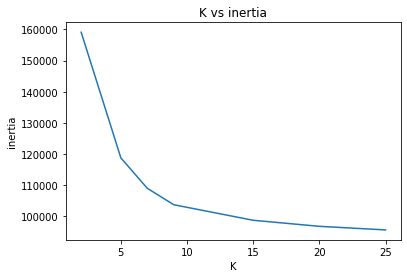

In [46]:
%%time
from sklearn.cluster import KMeans
inertia=[]
K=[2,5,7,9,15,20,25]
for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=0,algorithm="full").fit(tr_X_TFIDF)
    inertia.append(kmeans.inertia_)
plt.plot(K,inertia,label='inertia')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('K vs inertia')    

1. From above figure we can see that inflection is at k=5.

In [132]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tr_X_TFIDF)
#storing cluster label of each point
X_train['cluster_label']=kmeans.labels_.reshape(-1,1)
X_train[:2]

Unnamed: 0       id                        teacher_id teacher_prefix  \
22470       16301  p102862  8b996f6d87703d2630413100b590dd62            Ms.   
61672       74853  p119206  058b33d511a2c806b2396ef8c27b9c72            Ms.   

      school_state                Date project_grade_category  \
22470           CA 2016-08-03 16:06:00             Grades 3-5   
61672           VA 2016-10-24 16:46:00             Grades 3-5   

                  project_title  \
22470  keeping fit healthy apps   
61672                technology   

                                project_resource_summary  \
22470  My students need chromebooks, an iPad, and iPa...   
61672  My students need to be able to access technolo...   

       teacher_number_of_previously_posted_projects      ...        \
22470                                            66      ...         
61672                                             0      ...         

      clean_categories_not_approved clean_subcategories_approved  \
22470                         0.148                        0.857   
61672                         0.180                        0.815   

      clean_subcategories_not_approved  teacher_prefix_approved  \
22470                            0.143                    0.843   
61672                            0.185                    0.843   

       teacher_prefix_not_approved school_state_approved  \
22470                        0.157                 0.858   
61672                        0.157                 0.843   

       school_state_not_approved  project_grade_category_approved  \
22470                      0.142                            0.854   
61672                      0.157                            0.854   

       project_grade_category_not_approved  cluster_label  
22470                                0.146              4  
61672                                0.146              0  

[2 rows x 29 columns]

In [50]:
#Cluster distribution
X_train.cluster_label.value_counts()

0    39688
1     5604
4     3093
2      550
3      106
Name: cluster_label, dtype: int64

In [93]:
#function to print Word Cloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
def get_word_could(FP_data):
    comment_words=''
    stopwords = set(STOPWORDS) 
    for val in tqdm(FP_data):
        
        val = str(val)
        tokens = val.split() 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        for words in tokens: 
            comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (25, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

<h5>Word cloud for Cluster 0

100%|██████████████████████████████████| 10000/10000 [1:25:28<00:00,  1.95it/s]


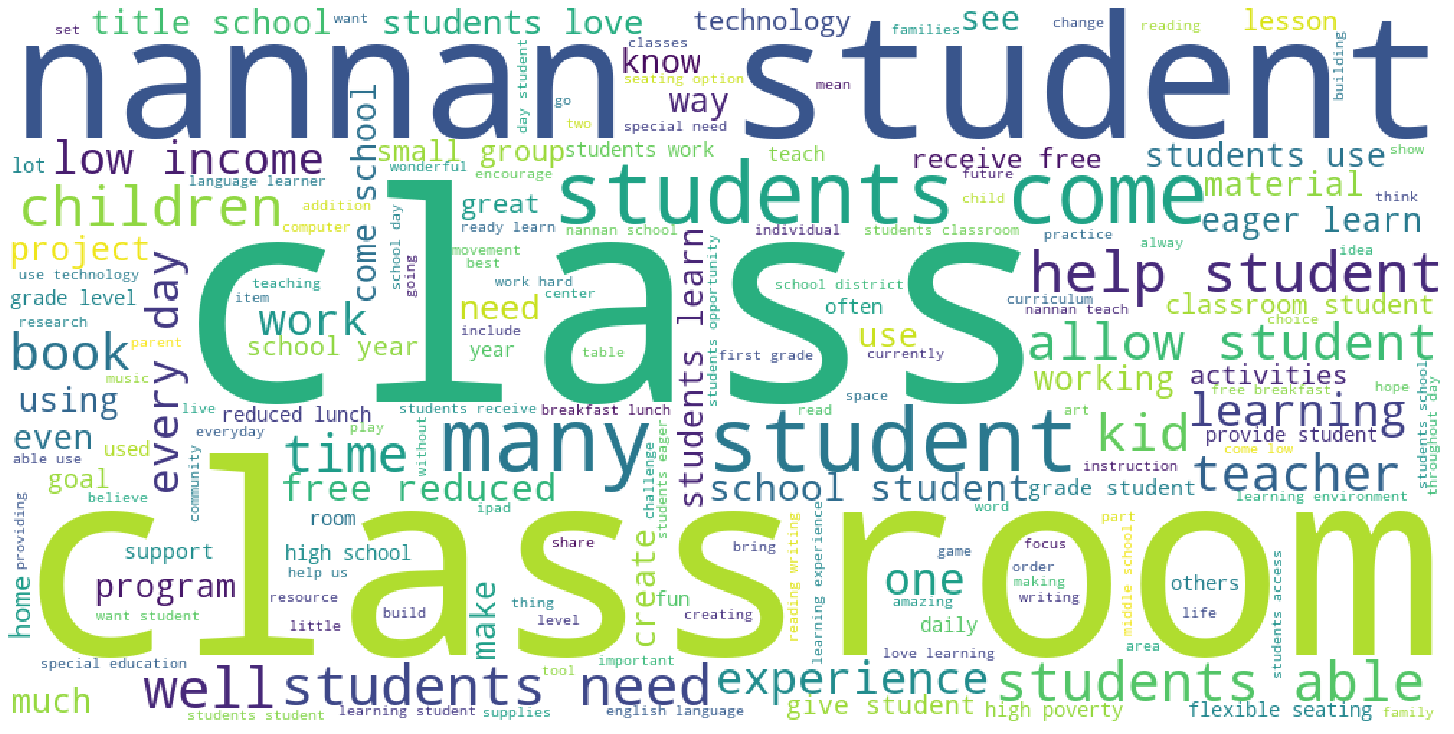

In [147]:
clust_0=X_train[X_train['cluster_label']==0]
get_word_could(clust_0['essay'][:10000])


In [124]:
for i in range(1,3):
    print("Essay ",i)
    print(clust_0.essay.values[i])

Essay  1
students loving hardworking happy enjoy learning love school students inner city school high poverty students receive free lunch speak another language home participate dual language classroom learn english spanish school day despite challenges make remarkable progress throughout year students one day change world cannot wait see far go students would love use trampolines exercise balls classroom could bounce energy would allow focus lessons students could use trampolines practice letters sounds sight words well numbers also use exercise balls flexible seating classroom allows students comfortable seating working trampolines exercise balls help students become healthier happier classroom movement something students crave project make huge difference classroom nannan
Essay  2
school located virginia beach virginia title 1 school area located near naval base allows military non military families attend school come different backgrounds classroom come together get teach one anoth

<h5>Word cloud for Cluster 1

100%|██████████████████████████████████████| 5604/5604 [29:04<00:00,  3.21it/s]


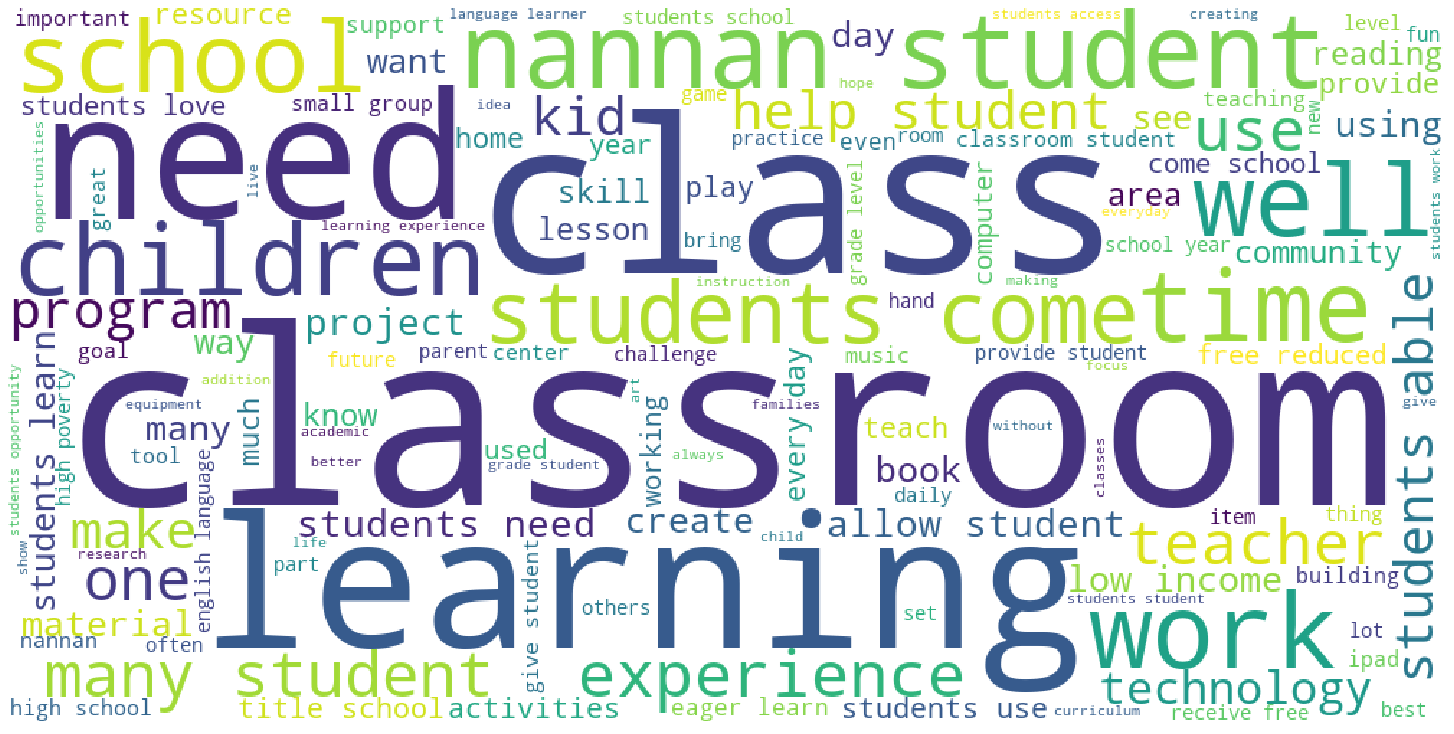

In [148]:
clust_1=X_train[X_train['cluster_label']==1]
get_word_could(clust_1['essay'])

In [128]:
for i in range(1,3):
    print("Essay ",i)
    print(clust_1.essay.values[i])

Essay  1
much fun hardest 4 points ever earn one 1st year robotics members said realized no longer last place competing mostly high school robotics teams youngest team made words even meaningful rookie team competition last place never expected students come expect become leaders part life school district goals prepare students life develop leaders result consistently pushing students small charter school towards success real world lessons opportunities cultivate leadership character charter school campus life middle school waxahachie consists 510 seventh eighth graders almost equal amount gender robotics team almost 1 4 girl boy ratio 2nd year doubled size anticipating year mindstorm ev3 kits used support real world problems students able make use creative ideas creating robots machines solve problems using critical thinking skills not students solving real world problems able compete others similar interest expand desire stem activities added interests help increase stem high schools

<h5>Word cloud for Cluster 2

100%|███████████████████████████████████████| 550/550 [00:02<00:00, 210.12it/s]


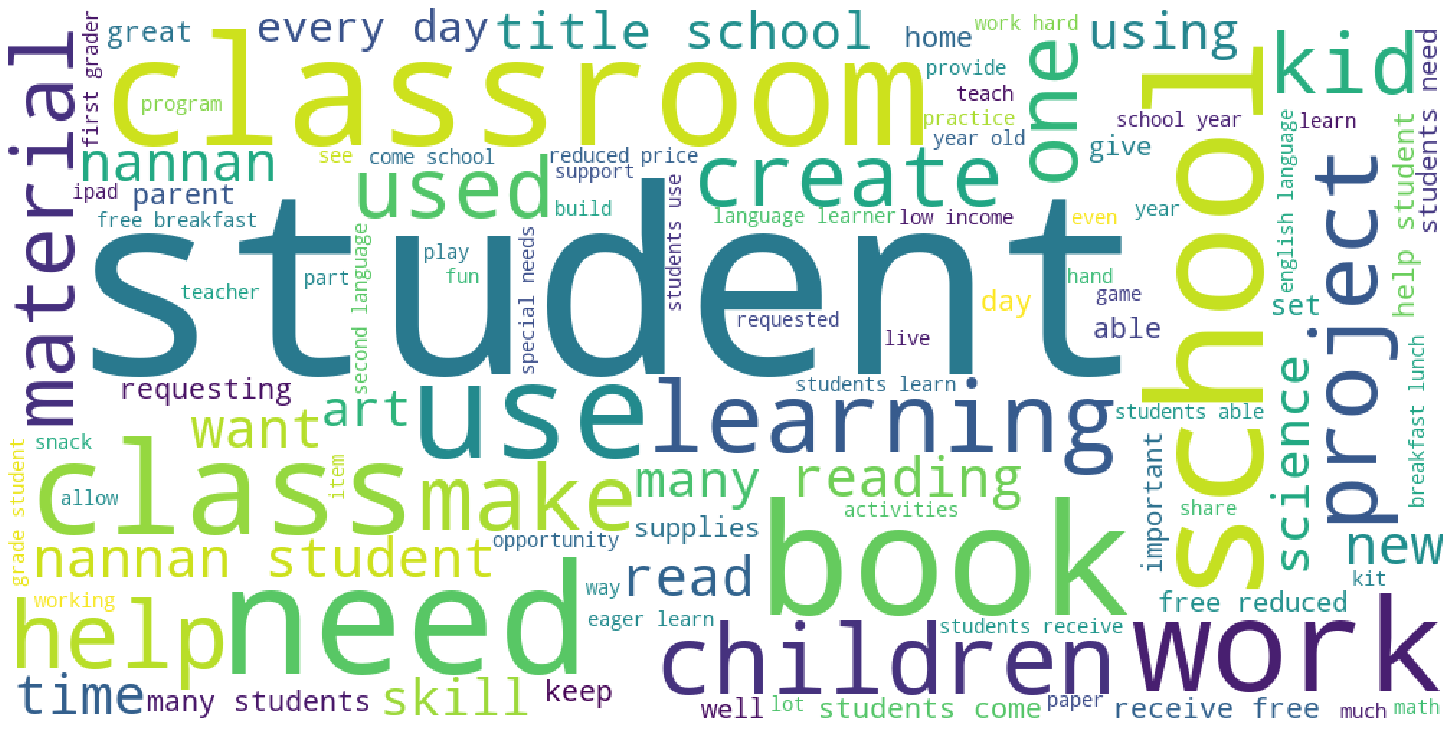

In [149]:
clust_2=X_train[X_train['cluster_label']==2]
get_word_could(clust_2['essay'])

In [129]:
for i in range(1,3):
    print("Essay ",i)
    print(clust_2.essay.values[i])

Essay  1
students wondrous group students reside poorest congressional district united states challenge simply come school every day resilient not let life difficulties get way learning many first families attend college understand value education proud teacher future owe give best opportunity succeed math not 8 5 x 11 math sorts different shapes sizes scissors not cut straight scissors take forever cutter cut perfect lines shapes sizes students use cutter cut large paper smaller paper use cut stacks students cut paper different sizes mathematics not constricted letter size paper varying size paper makes math fun engaging students able better utilize current paper resources not need waste cut larger paper smaller ones individual math problems smaller sheet use index cards smaller paper easier carry around help studies nannan
Essay  2
class loves books adore readaloud excited road independent reading families send school every day ready learn work hard fun students english language lear

<h5>Word cloud for Cluster 3

100%|██████████████████████████████████████| 106/106 [00:00<00:00, 1161.80it/s]


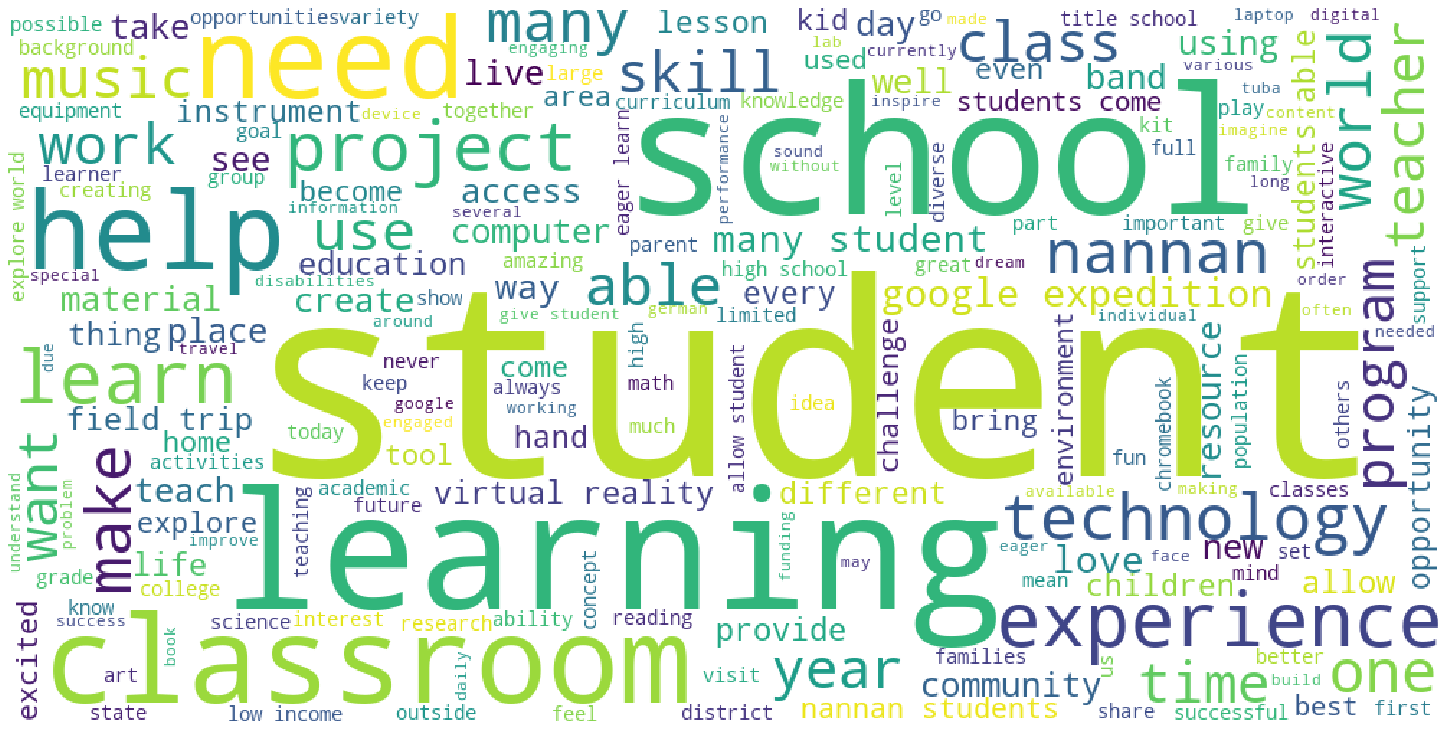

In [150]:
clust_3=X_train[X_train['cluster_label']==3]
get_word_could(clust_3['essay'])

In [130]:
for i in range(1,3):
    print("Essay ",i)
    print(clust_3.essay.values[i])

Essay  1
imagine knowing various technological devices exist not ability exposed frequent basis moving school advanced technology school not school urban public school services 800 students pre k 4th grade students come variety different economic backgrounds 80 students receiving free lunch reduced lunch many students receive food backpacks weekend offer several clubs organizations like girlstart sister sister brother brother dare dream g p girls achieving potential young leaders tomorrow name extracurricular activities promote encourage academic success well fostering positive social skills building meaningful relationships school also one ethnically diverse schools houston metro area students speak variety languages diverse students economically culturally diverse academics well virtual reality set students really able visualize concepts taught provide meaningful understanding things around us access visiting space animals national landmarks rain forest even inside human body student

<h5>Word cloud for Cluster 4

100%|██████████████████████████████████████| 3093/3093 [07:48<00:00,  6.60it/s]


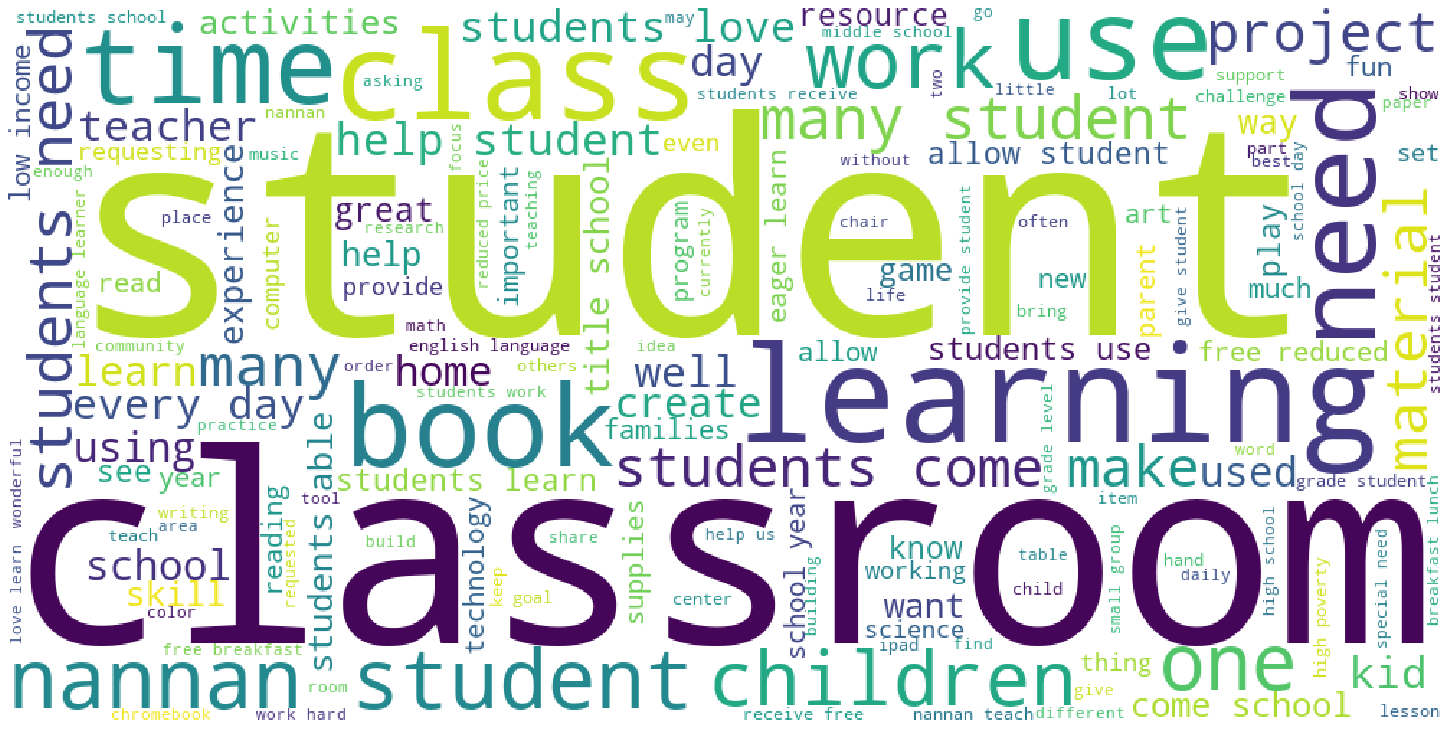

In [151]:
clust_4=X_train[X_train['cluster_label']==4]
get_word_could(clust_4['essay'])

In [131]:
for i in range(1,3):
    print("Essay ",i)
    print(clust_4.essay.values[i])

Essay  1
students freshmen students signed ap environmental science give rigorous course first year high school living southeast side chicago attending neighborhood high school interested science challenged importantly change agents environment extremely hard working motivated get 3 ap exam preparing college freshmen high school apes box book book hand drawn diagrams really help students master concepts learn material alternative way also great videos accompany readings give kids support environmental topics appear test book also adapted ap material student friendly engaging still informative allows students access information apply ap style multiple choice questions free response questions fully prepare ap exam may nannan
Essay  2
students awesome creative excited learning privileged teach music rural public school serving 900 students grades kindergarten 4th including special group children facing severe physical mental disabilities school high poverty strive daily provide equitable 

<h2>2.6 Apply AgglomerativeClustering</h2>

In [58]:
%%time
from sklearn.cluster import AgglomerativeClustering
Agglomerative_n_2 = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(tr_X_TFIDF[:10000])


Wall time: 7min 13s


In [59]:
#X_train.drop("cluster_label")
agglo_train=X_train[:10000]
agglo_train['cluster_label']=Agglomerative_n_2.labels_.reshape(-1,1)
print(agglo_train.cluster_label.value_counts())
agglo_train[:2]

0    9918
1      82
Name: cluster_label, dtype: int64


Unnamed: 0       id                        teacher_id teacher_prefix  \
22470       16301  p102862  8b996f6d87703d2630413100b590dd62            Ms.   
61672       74853  p119206  058b33d511a2c806b2396ef8c27b9c72            Ms.   

      school_state                Date project_grade_category  \
22470           CA 2016-08-03 16:06:00             Grades 3-5   
61672           VA 2016-10-24 16:46:00             Grades 3-5   

                  project_title  \
22470  keeping fit healthy apps   
61672                technology   

                                project_resource_summary  \
22470  My students need chromebooks, an iPad, and iPa...   
61672  My students need to be able to access technolo...   

       teacher_number_of_previously_posted_projects      ...        \
22470                                            66      ...         
61672                                             0      ...         

      clean_categories_not_approved clean_subcategories_approved  \
22470                         0.148                        0.857   
61672                         0.180                        0.815   

      clean_subcategories_not_approved  teacher_prefix_approved  \
22470                            0.143                    0.843   
61672                            0.185                    0.843   

       teacher_prefix_not_approved school_state_approved  \
22470                        0.157                 0.858   
61672                        0.157                 0.843   

       school_state_not_approved  project_grade_category_approved  \
22470                      0.142                            0.854   
61672                      0.157                            0.854   

       project_grade_category_not_approved  cluster_label  
22470                                0.146              0  
61672                                0.146              0  

[2 rows x 29 columns]

<h5>Word cloud for Agglomerative  Cluster 0

100%|██████████████████████████████████████| 1065/1065 [00:12<00:00, 83.69it/s]


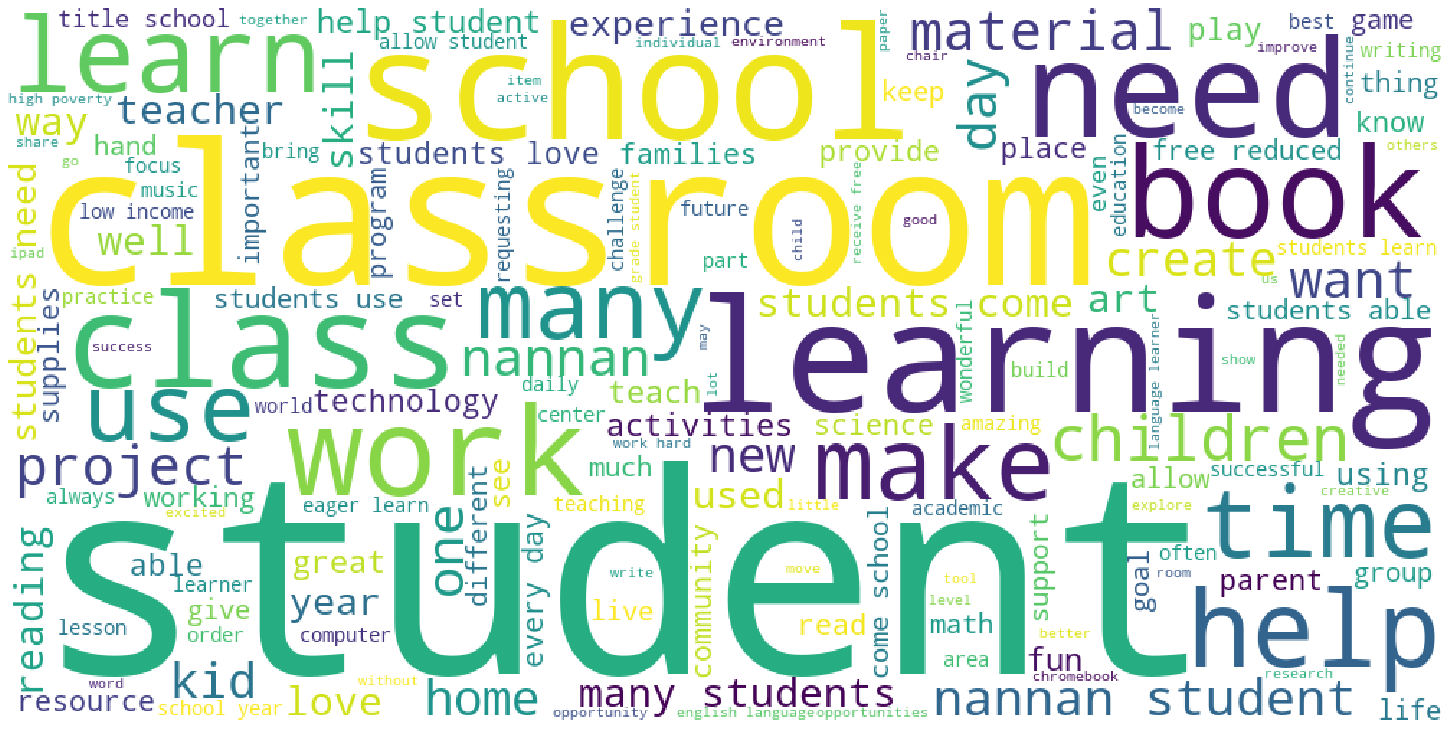

In [152]:
agglo_clust_0=agglo_train[agglo_train['cluster_label']==0]
get_word_could(agglo_clust_0['essay'])

In [137]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_0.essay.values[i])

Essay  1
students freshmen students signed ap environmental science give rigorous course first year high school living southeast side chicago attending neighborhood high school interested science challenged importantly change agents environment extremely hard working motivated get 3 ap exam preparing college freshmen high school apes box book book hand drawn diagrams really help students master concepts learn material alternative way also great videos accompany readings give kids support environmental topics appear test book also adapted ap material student friendly engaging still informative allows students access information apply ap style multiple choice questions free response questions fully prepare ap exam may nannan
Essay  2
target students 7th 8th grade title school high population students qualify free reduced price lunch incredibly bright eager learn love working inquiry driven projects require work together apply twenty first century skills also embrace use technology projec

<h5>Word cloud for Agglomerative Cluster 1

100%|██████████████████████████████████████| 1943/1943 [02:39<00:00, 12.17it/s]


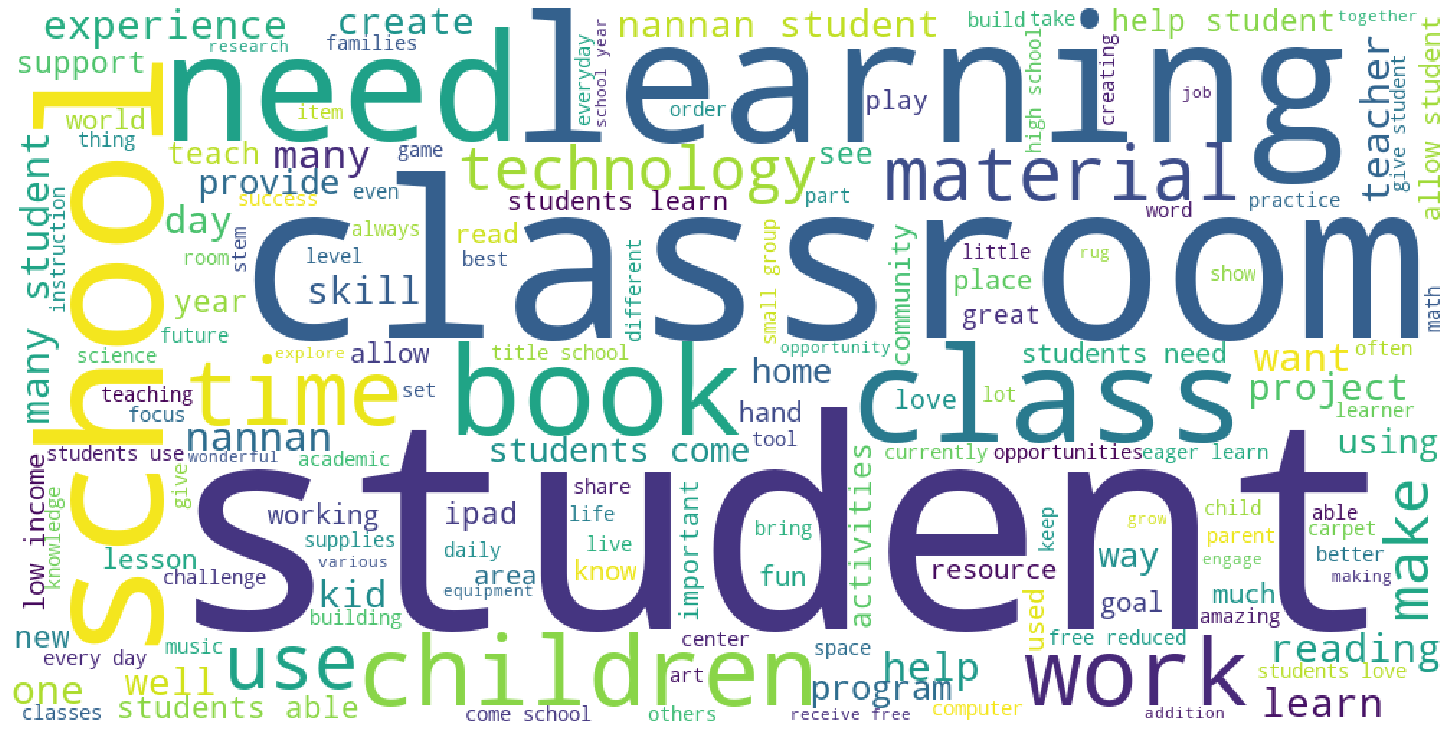

In [153]:
agglo_clust_1=agglo_train[agglo_train['cluster_label']==1]
get_word_could(agglo_clust_1['essay'])

In [138]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_1.essay.values[i])

Essay  1
resource teacher service diverse group students english learners latin america egypt nepal socioeconomically advantaged others homeless loving supportive parents others reliable adult home common learning disability students vary age ability kindergarten 5th grade variety academic needs including significant behaviors affect ability access regular classroom instruction youngest work improve basic reading readiness skills like phonemic awareness phonics sight words older students come build skills improve fluency comprehension get primary language support support students academic areas greatest focus literacy impacts areas school quality life hard encounter new culture learn new language added disadvantage learning disability make feel odds insurmountable classroom place students come beat odds servicing diverse group students requires flexibility time organization use space multiple groups taught simultaneously mobile learning stations make classroom flexibility less intrusiv

<h6>6.1 Agglomerative Clustering

In [62]:
%%time
from sklearn.cluster import AgglomerativeClustering
Agglomerative_n_5 = AgglomerativeClustering(n_clusters=5,linkage='ward').fit(tr_X_TFIDF[:10000])

Wall time: 7min 14s


In [63]:
#agglo_train.drop("cluster_label")
agglo_train=X_train[:10000]
agglo_train['cluster_label']=Agglomerative_n_5.labels_.reshape(-1,1)
print(agglo_train.cluster_label.value_counts())
agglo_train[:2]

4    6678
1    1943
0    1065
2     232
3      82
Name: cluster_label, dtype: int64


Unnamed: 0       id                        teacher_id teacher_prefix  \
22470       16301  p102862  8b996f6d87703d2630413100b590dd62            Ms.   
61672       74853  p119206  058b33d511a2c806b2396ef8c27b9c72            Ms.   

      school_state                Date project_grade_category  \
22470           CA 2016-08-03 16:06:00             Grades 3-5   
61672           VA 2016-10-24 16:46:00             Grades 3-5   

                  project_title  \
22470  keeping fit healthy apps   
61672                technology   

                                project_resource_summary  \
22470  My students need chromebooks, an iPad, and iPa...   
61672  My students need to be able to access technolo...   

       teacher_number_of_previously_posted_projects      ...        \
22470                                            66      ...         
61672                                             0      ...         

      clean_categories_not_approved clean_subcategories_approved  \
22470                         0.148                        0.857   
61672                         0.180                        0.815   

      clean_subcategories_not_approved  teacher_prefix_approved  \
22470                            0.143                    0.843   
61672                            0.185                    0.843   

       teacher_prefix_not_approved school_state_approved  \
22470                        0.157                 0.858   
61672                        0.157                 0.843   

       school_state_not_approved  project_grade_category_approved  \
22470                      0.142                            0.854   
61672                      0.157                            0.854   

       project_grade_category_not_approved  cluster_label  
22470                                0.146              0  
61672                                0.146              4  

[2 rows x 29 columns]

<h5>Word cloud for Agglomerative Cluster 0

100%|██████████████████████████████████████| 1065/1065 [00:12<00:00, 83.44it/s]


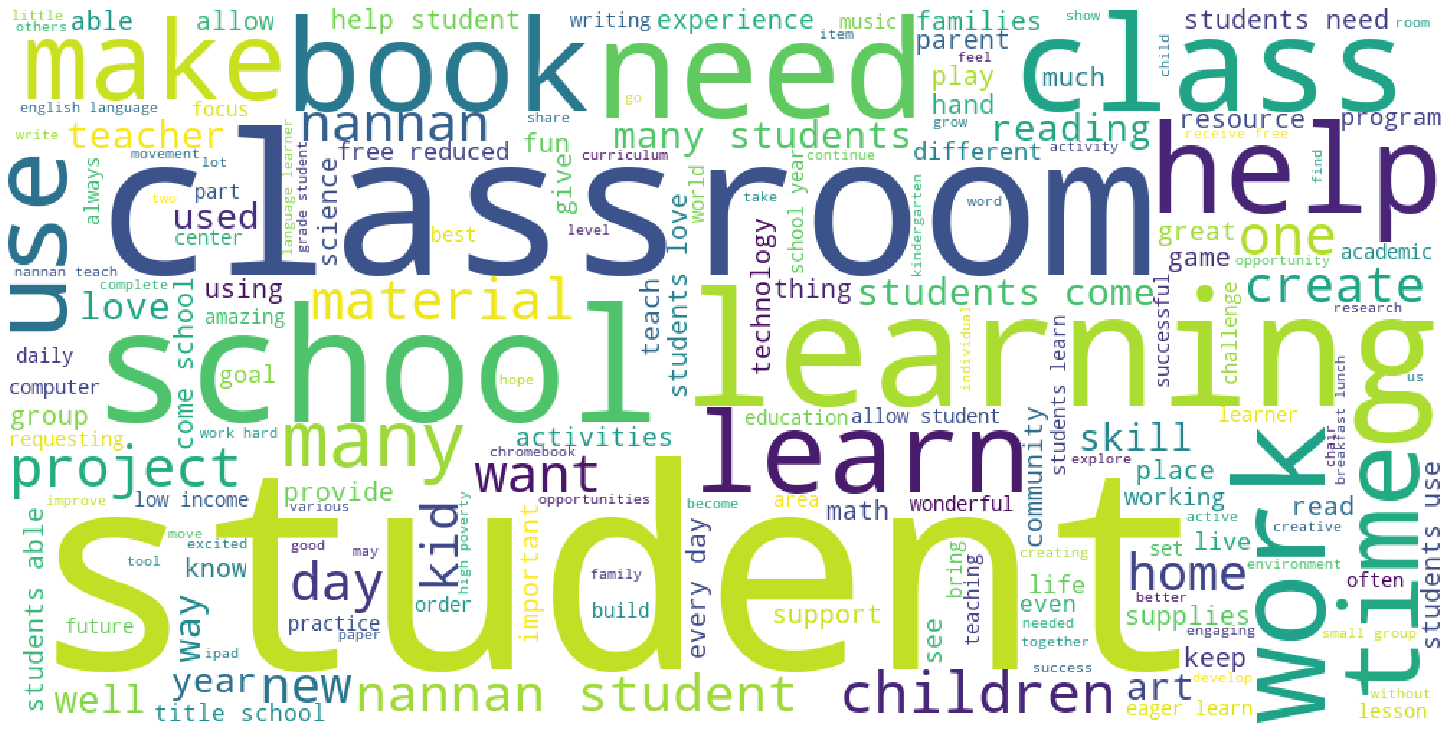

In [154]:
agglo_clust_0=agglo_train[agglo_train['cluster_label']==0]
get_word_could(agglo_clust_0['essay'])

In [139]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_0.essay.values[i])

Essay  1
students freshmen students signed ap environmental science give rigorous course first year high school living southeast side chicago attending neighborhood high school interested science challenged importantly change agents environment extremely hard working motivated get 3 ap exam preparing college freshmen high school apes box book book hand drawn diagrams really help students master concepts learn material alternative way also great videos accompany readings give kids support environmental topics appear test book also adapted ap material student friendly engaging still informative allows students access information apply ap style multiple choice questions free response questions fully prepare ap exam may nannan
Essay  2
target students 7th 8th grade title school high population students qualify free reduced price lunch incredibly bright eager learn love working inquiry driven projects require work together apply twenty first century skills also embrace use technology projec

<h5>Word cloud for Agglomerative Cluster 1

100%|██████████████████████████████████████| 1943/1943 [02:40<00:00, 12.09it/s]


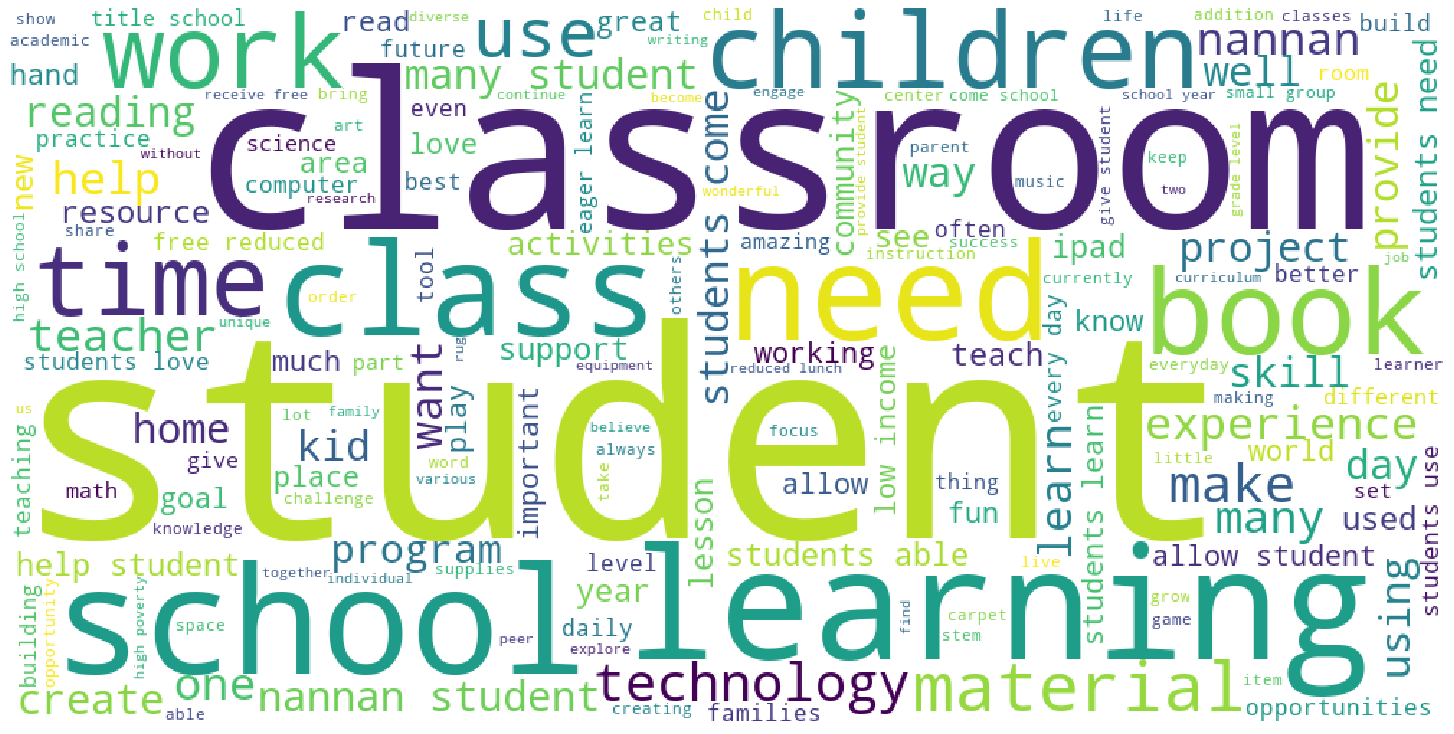

In [155]:
agglo_clust_1=agglo_train[agglo_train['cluster_label']==1]
get_word_could(agglo_clust_1['essay'])

In [140]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_1.essay.values[i])

Essay  1
resource teacher service diverse group students english learners latin america egypt nepal socioeconomically advantaged others homeless loving supportive parents others reliable adult home common learning disability students vary age ability kindergarten 5th grade variety academic needs including significant behaviors affect ability access regular classroom instruction youngest work improve basic reading readiness skills like phonemic awareness phonics sight words older students come build skills improve fluency comprehension get primary language support support students academic areas greatest focus literacy impacts areas school quality life hard encounter new culture learn new language added disadvantage learning disability make feel odds insurmountable classroom place students come beat odds servicing diverse group students requires flexibility time organization use space multiple groups taught simultaneously mobile learning stations make classroom flexibility less intrusiv

<h5>Word cloud for Agglomerative Cluster 2

100%|███████████████████████████████████████| 232/232 [00:00<00:00, 557.37it/s]


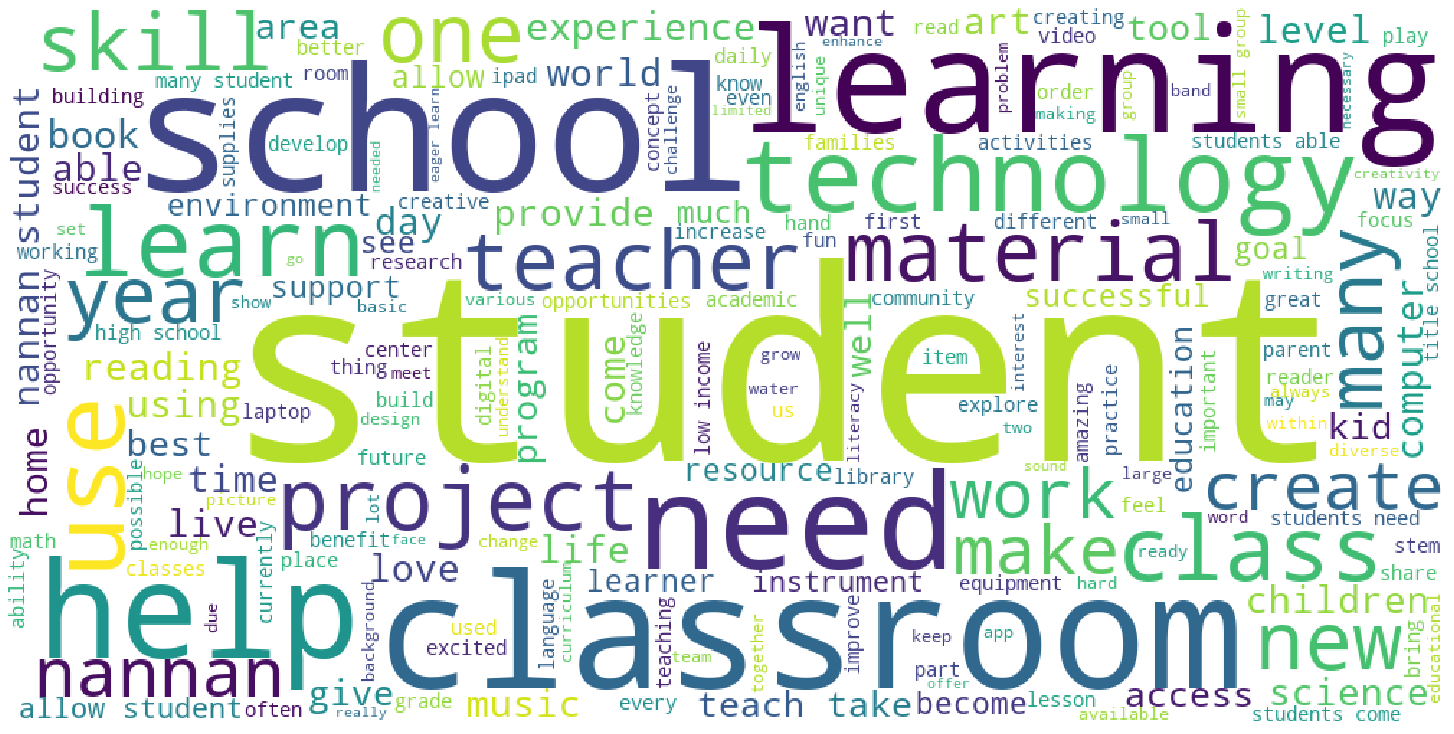

In [156]:
agglo_clust_2=agglo_train[agglo_train['cluster_label']==2]
get_word_could(agglo_clust_2['essay'])

In [141]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_2.essay.values[i])

Essay  1
special education teacher lld1 classroom teach students language learning disabled communication impairments grades k 1st 2nd grades students come school day full energy excitement day different day students come low economic backgrounds often find school place gives structure need special education teacher job assess student individual level help achieve success pace students require close assistance constant repetition redirection often perform grade level non special education peers students mainstreamed specials grade level try attend field trips general education peers often possible students appreciate many things provided may not means enhance education home thrive many opportunities provide school students greatly benefit ipad mini class love stimulating exciting ways learn often visual auditory learners students currently share one ipad class could tailor ipad individual needs special education class students deficits different areas able add apps language arts litera

<h5>Word cloud for Agglomerative Cluster 3 

100%|████████████████████████████████████████| 82/82 [00:00<00:00, 1318.18it/s]


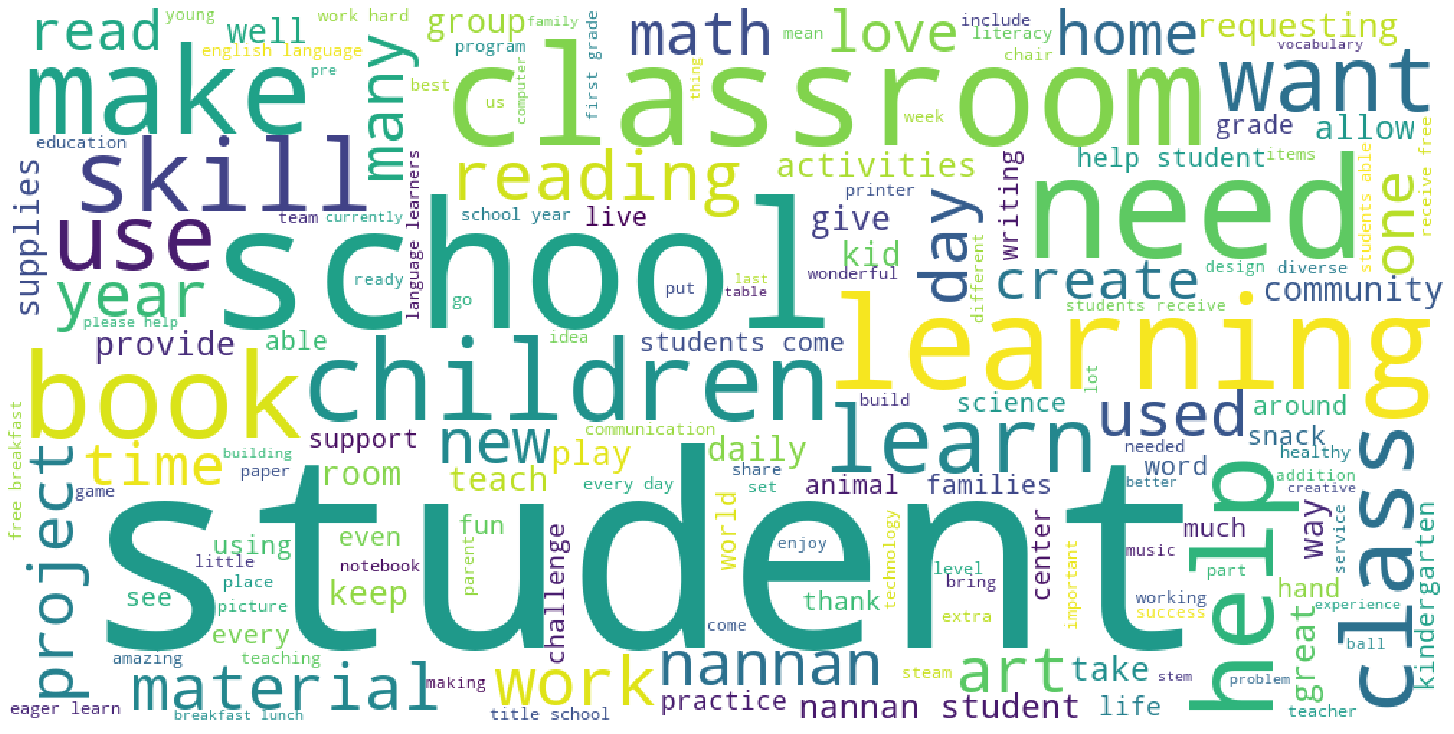

In [157]:
agglo_clust_3=agglo_train[agglo_train['cluster_label']==3]
get_word_could(agglo_clust_3['essay'])

In [142]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_3.essay.values[i])

Essay  1
teach dynamic group fabulous kindergarten students extremely diverse school brooklyn ny students love reading funny stories writing poetry creating art exploring science learning new words building dancing singing playing math games playing puppets learning new facts class loves beloved puppet chef lotsa words cooks sight words poems vocabulary words books day magic pot students funny enthusiastic inquisitive compassionate sweet would love kindergarten students variety hands math materials would use foam ten frame dice play counting comparing games dice help students count numbers zero twenty math links also help students practice counting one one correspondence button sorting center help students classify objects use number bond cards addition subtraction materials help strengthen students mathematical thinking build critical thinking skills please consider supporting marvelous kindergarten mathematicians nannan
Essay  2
love teaching kindergarten five year olds amazing energ

<h5>Word cloud for Agglomerative Cluster 4

100%|██████████████████████████████████████| 6678/6678 [37:49<00:00,  2.94it/s]


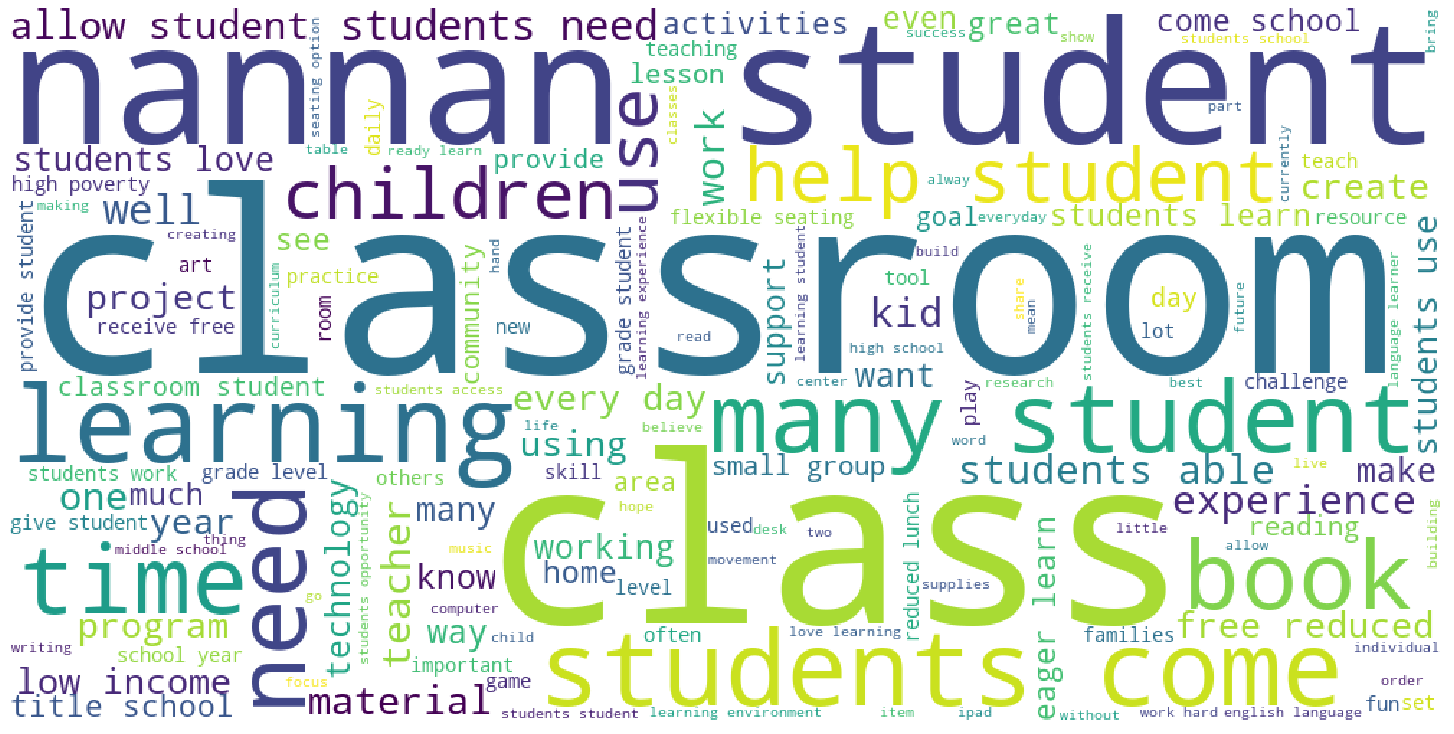

In [158]:
agglo_clust_4=agglo_train[agglo_train['cluster_label']==4]
get_word_could(agglo_clust_4['essay'])

In [143]:
for i in range(1,3):
    print("Essay ",i)
    print(agglo_clust_4.essay.values[i])

Essay  1
students loving hardworking happy enjoy learning love school students inner city school high poverty students receive free lunch speak another language home participate dual language classroom learn english spanish school day despite challenges make remarkable progress throughout year students one day change world cannot wait see far go students would love use trampolines exercise balls classroom could bounce energy would allow focus lessons students could use trampolines practice letters sounds sight words well numbers also use exercise balls flexible seating classroom allows students comfortable seating working trampolines exercise balls help students become healthier happier classroom movement something students crave project make huge difference classroom nannan
Essay  2
school located virginia beach virginia title 1 school area located near naval base allows military non military families attend school come different backgrounds classroom come together get teach one anoth

<h2>2.7 Apply DBSCAN</h2>

In [69]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [70]:
neigh = NearestNeighbors(n_neighbors=6000)
nbrs = neigh.fit(tr_X_TFIDF[:10000])
distances, indices = nbrs.kneighbors(tr_X_TFIDF[:10000])

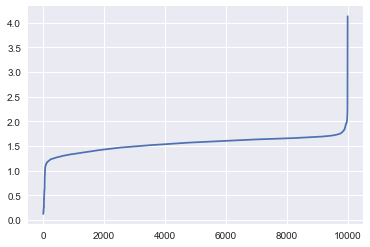

In [71]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [72]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

In [73]:
from sklearn.cluster import DBSCAN
# train data has dimension d=4990 as rule of thumb min_pts=2*d i.e min_pts=9980
clustering = DBSCAN(eps=1.8, min_samples=5000).fit(tr_X_TFIDF[:10000])


In [74]:
dbscan_train=X_train[:10000]
dbscan_train['cluster_label']=clustering.labels_.reshape(-1,1)
print(dbscan_train.cluster_label.value_counts())
agglo_train[:2]

 0    8149
-1    1851
Name: cluster_label, dtype: int64


Unnamed: 0       id                        teacher_id teacher_prefix  \
22470       16301  p102862  8b996f6d87703d2630413100b590dd62            Ms.   
61672       74853  p119206  058b33d511a2c806b2396ef8c27b9c72            Ms.   

      school_state                Date project_grade_category  \
22470           CA 2016-08-03 16:06:00             Grades 3-5   
61672           VA 2016-10-24 16:46:00             Grades 3-5   

                  project_title  \
22470  keeping fit healthy apps   
61672                technology   

                                project_resource_summary  \
22470  My students need chromebooks, an iPad, and iPa...   
61672  My students need to be able to access technolo...   

       teacher_number_of_previously_posted_projects      ...        \
22470                                            66      ...         
61672                                             0      ...         

      clean_categories_not_approved clean_subcategories_approved  \
22470                         0.148                        0.857   
61672                         0.180                        0.815   

      clean_subcategories_not_approved  teacher_prefix_approved  \
22470                            0.143                    0.843   
61672                            0.185                    0.843   

       teacher_prefix_not_approved school_state_approved  \
22470                        0.157                 0.858   
61672                        0.157                 0.843   

       school_state_not_approved  project_grade_category_approved  \
22470                      0.142                            0.854   
61672                      0.157                            0.854   

       project_grade_category_not_approved  cluster_label  
22470                                0.146              0  
61672                                0.146              4  

[2 rows x 29 columns]

<h5>Word cloud for DBSCAN Cluster 0

100%|██████████████████████████████████████| 8149/8149 [57:19<00:00,  2.37it/s]


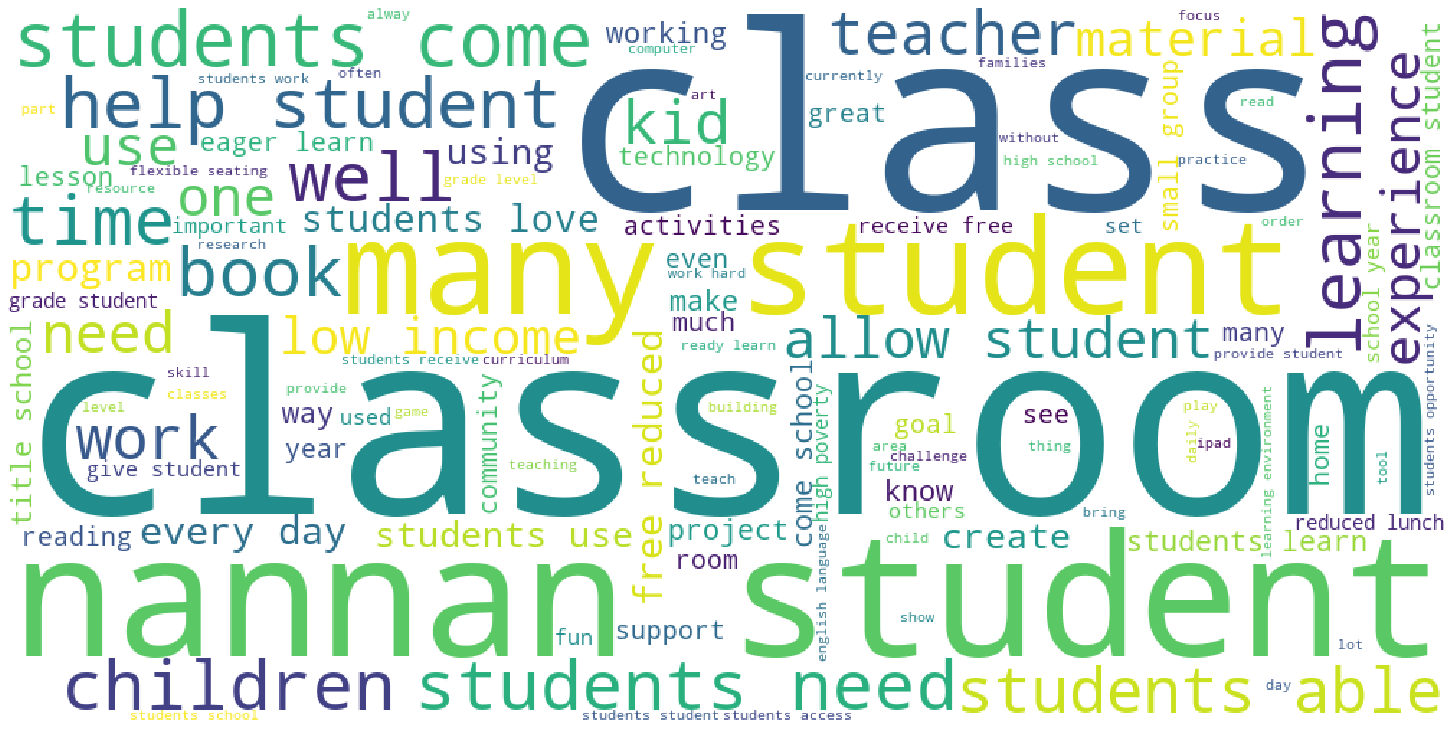

In [159]:
dbscan_clust_0=dbscan_train[dbscan_train['cluster_label']==0]
get_word_could(dbscan_clust_0['essay'])

In [144]:
for i in range(1,3):
    print("Essay ",i)
    print(dbscan_clust_0.essay.values[i])

Essay  1
students loving hardworking happy enjoy learning love school students inner city school high poverty students receive free lunch speak another language home participate dual language classroom learn english spanish school day despite challenges make remarkable progress throughout year students one day change world cannot wait see far go students would love use trampolines exercise balls classroom could bounce energy would allow focus lessons students could use trampolines practice letters sounds sight words well numbers also use exercise balls flexible seating classroom allows students comfortable seating working trampolines exercise balls help students become healthier happier classroom movement something students crave project make huge difference classroom nannan
Essay  2
school located virginia beach virginia title 1 school area located near naval base allows military non military families attend school come different backgrounds classroom come together get teach one anoth

<h5>Word cloud for DBSCAN Cluster 1

100%|██████████████████████████████████████| 1851/1851 [02:26<00:00, 12.63it/s]


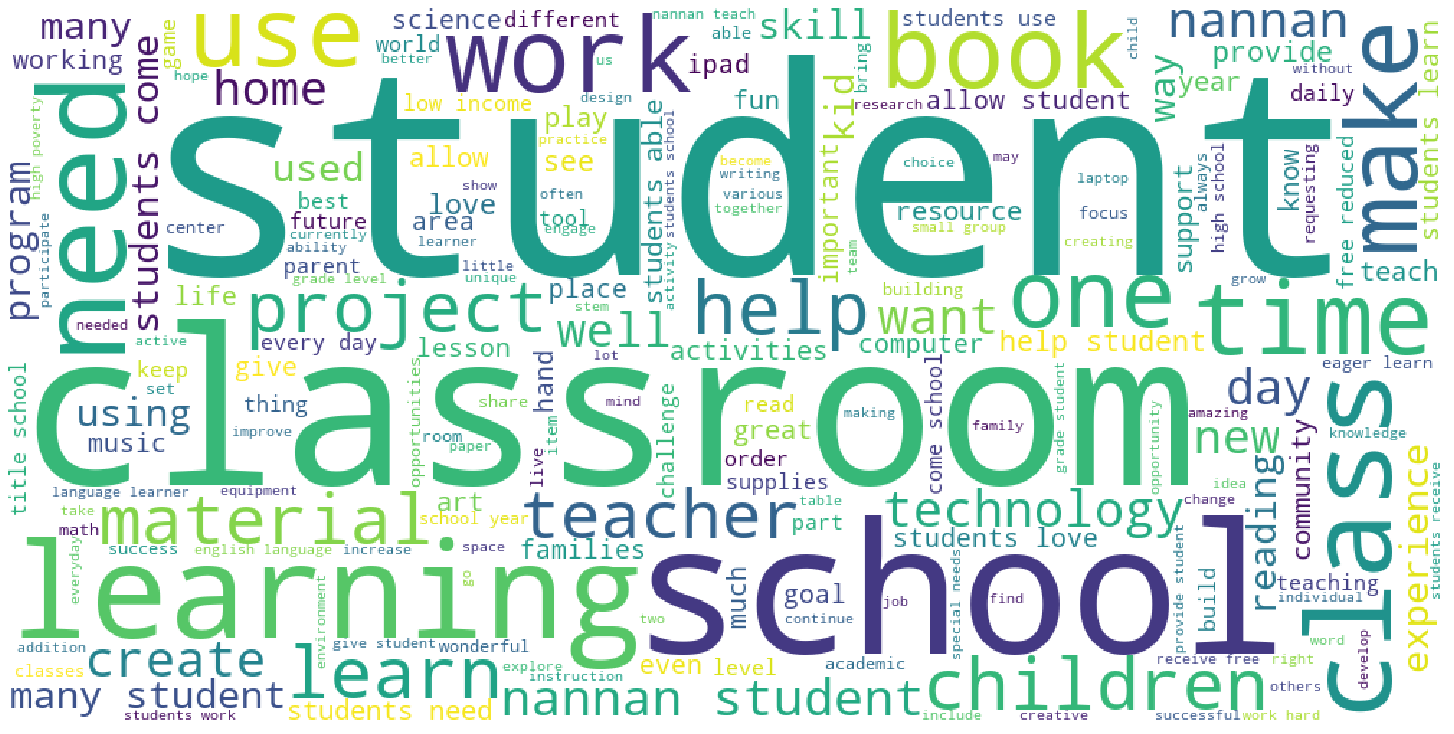

In [160]:
dbscan_clust_1=dbscan_train[dbscan_train['cluster_label']==-1]
get_word_could(dbscan_clust_1['essay'])

In [146]:
for i in range(1,3):
    print("Essay ",i)
    print(dbscan_clust_1.essay.values[i])

Essay  1
students freshmen students signed ap environmental science give rigorous course first year high school living southeast side chicago attending neighborhood high school interested science challenged importantly change agents environment extremely hard working motivated get 3 ap exam preparing college freshmen high school apes box book book hand drawn diagrams really help students master concepts learn material alternative way also great videos accompany readings give kids support environmental topics appear test book also adapted ap material student friendly engaging still informative allows students access information apply ap style multiple choice questions free response questions fully prepare ap exam may nannan
Essay  2
resource teacher service diverse group students english learners latin america egypt nepal socioeconomically advantaged others homeless loving supportive parents others reliable adult home common learning disability students vary age ability kindergarten 5th

In [163]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model", "Tried on 'n' clusters"]
x.add_row(["TFIDF", "KMeans Clustering(Optimal k = 5)", "5"])
x.add_row(["TFIDF", "Agglomerative Clustering","2 and 10"])
x.add_row(["TFIDF", "DBSCAN Clustering(eps=1.8, min_samples=5000)","2"])
print(x)

+-----------------+----------------------------------------------+-----------------------+
| Vectorizer Used |                    Model                     | Tried on 'n' clusters |
+-----------------+----------------------------------------------+-----------------------+
|      TFIDF      |       KMeans Clustering(Optimal k = 5)       |           5           |
|      TFIDF      |           Agglomerative Clustering           |        2 and 10       |
|      TFIDF      | DBSCAN Clustering(eps=1.8, min_samples=5000) |           2           |
+-----------------+----------------------------------------------+-----------------------+
